<a href="https://colab.research.google.com/github/rosita-vlzq03/THC_EjerciciosPython_rosa/blob/main/minimoscuadrados25_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)

# Datos obtenidos de
# K.F. Riley, M. P. Hobson, S. J. Bence, 2006
# Mathematical Methods for Physics and Engineering.
# Cambridge University Press, 3rd Edition, 1363.

[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

suma_x=np.sum(x)
suma_y=np.sum(y)
suma_xy=np.sum(x*y)
suma_x2=np.sum(x**2)

n=len(x)
m=(n*suma_xy-suma_x*suma_y)/(n*suma_x2-suma_x**2)
b=(suma_y-m*suma_x)/n
print(m)
print(b)

1.1091488253986432
0.38873678208868867


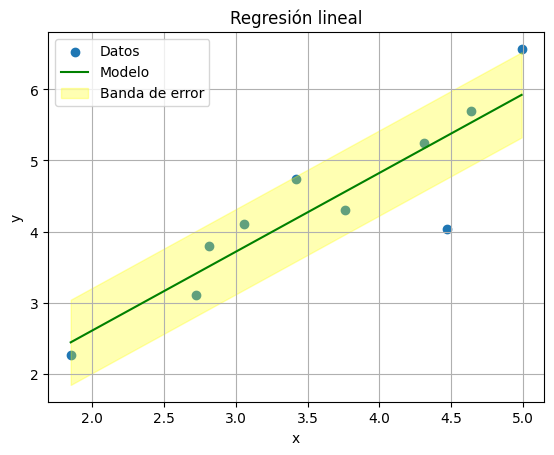

In [3]:
y_model=m*x+b
xline=np.linspace(min(x),max(x),100)
yline=m*(xline)+b

res=y-y_model
er=np.abs(res/y)*100
media=np.mean(y)
var=np.sum(res**2)/(n-2)
desv=np.sqrt(var)
cv=desv/media*100

linsup=yline+desv
lininf=yline-desv

plt.scatter(x,y,label="Datos")
plt.plot(x,y_model, color="green",label="Modelo")
plt.xlabel("x")
plt.ylabel("y")

plt.fill_between(xline,lininf,linsup, color="yellow",alpha=0.3,label="Banda de error")
plt.legend()
plt.title("Regresión lineal")
plt.grid(True)
plt.show()

-0.005716456678518833 1.1491159490857963 [0.32413756]


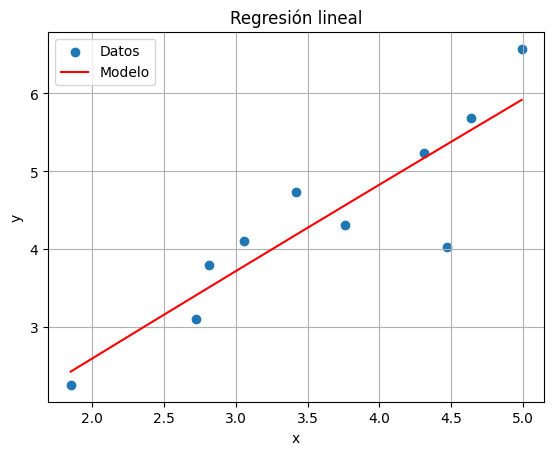

In [4]:
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x =np.array([df["x"].to_numpy()]).reshape(-1,1)
y =np.array([df["y"].to_numpy()]).reshape(-1,1)

poly=PolynomialFeatures(degree=2, include_bias=True)
x_poly=poly.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)

c=model.intercept_
a,b=model.coef_[0][2],model.coef_[0][1]

print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit=poly.transform(x_fit)

y_final=model.predict(y_fit)

plt.scatter(x,y,label="Datos")
plt.plot(x_fit,y_final,color="red",label="Modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión lineal")
plt.grid(True)
plt.show()